# Building Autoencoder to denoise MNIST Fashion Dataset images

## Importing the Library


In [1]:
#Importing Required Libraries

import tensorflow as tf #Importing Tensorflow Library
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


## Importing Dataset


In [2]:
from keras.datasets import fashion_mnist

# load dataset
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

## Performing Data Exploration

In [3]:
## Viewing the dataset

print(X_train[:5])
print(X_test[:5])
print(Y_train[:5])
print(Y_test[:5])

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0

In [4]:
## Shape of the dataset

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [5]:
print(list(map(tuple, np.where(np.isnan(X_train)))))
print(list(map(tuple, np.where(np.isnan(X_test)))))
print(list(map(tuple, np.where(np.isnan(Y_train)))))
print(list(map(tuple, np.where(np.isnan(Y_test)))))

[(), (), ()]
[(), (), ()]
[()]
[()]


There are no null values in the dataset


In [6]:
 # Count if unique values in training set
 pd.value_counts(Y_train)

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
dtype: int64

In [7]:
# Count if unique values in test set
pd.value_counts(Y_test)

7    1000
6    1000
5    1000
4    1000
3    1000
2    1000
9    1000
1    1000
8    1000
0    1000
dtype: int64

The dataset is evenly distributed for both trainging and test set.

In [8]:
## Visualising the dataset

In [9]:
## Map target column
target = {
0: "T-shirt/top",
1: "Trouser",
2: "Pullover",
3: "Dress",
4: "Coat",
5: "Sandal",
6: "Shirt",
7: "Sneaker",
8: "Bag",
9: "Ankle boot"
}


In [10]:
## Loading Datase for Visualisation

(X_TR, Y_TR), (X_TE, Y_TE) = fashion_mnist.load_data()

In [11]:
## Visualise the dataset

def image_show(position = 0,X_TRAIN=X_TR,Y_TRAIN=Y_TR):
  # define subplot
  #plt.subplot(330 + 1 + position)
	# plot raw pixel data
  plt.imshow(X_TRAIN[position], cmap=plt.get_cmap('gray'))
  # show the figure
  plt.show()
  print("Image "+str(position)+" : "+target[Y_TR[position]])

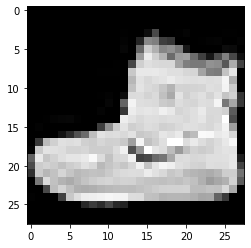

Image 0 : Ankle boot


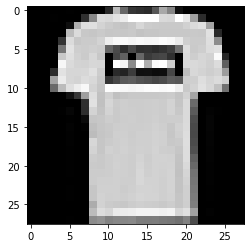

Image 1 : T-shirt/top


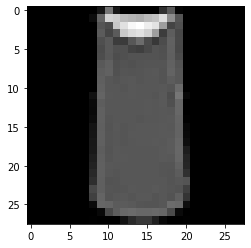

Image 2 : T-shirt/top


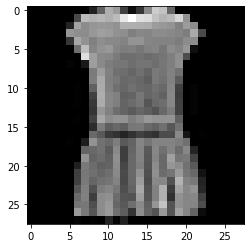

Image 3 : Dress


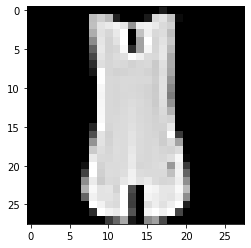

Image 4 : T-shirt/top


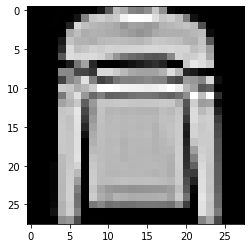

Image 5 : Pullover


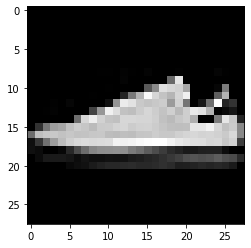

Image 6 : Sneaker


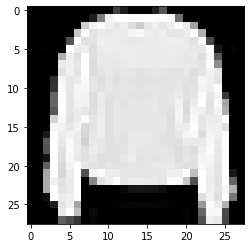

Image 7 : Pullover


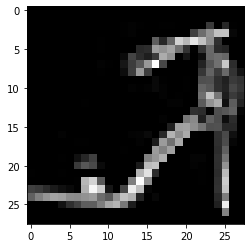

Image 8 : Sandal


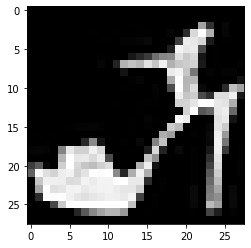

Image 9 : Sandal


In [12]:
for i in range(10):
  image_show(i,X_TR, Y_TR)

## Data Pre-processing

In [13]:
## Reshaping the test and train data for model to accept it
#
#model_shape = 784
#print(model_shape)
#X_train = X_train.reshape(60000, model_shape) 
#X_test = X_test.reshape(10000, model_shape) 

In [14]:
## Converting the data into float 32 for model training

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [15]:
## Normalising the data between [0,1]

# Normalizing the input to be within the range [0,1]
X_train /= 255
#intensity of each pixel is divided by 255, the maximum intensity value
X_test /= 255

In [16]:
## Reshaping the dataset
X_train = X_train.reshape(len(X_train),28,28,1)
X_test = X_test.reshape(len(X_test),28,28,1)

In [17]:
## Verifying the shape of model after normalisation
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [18]:
## Adding Salt and Pepper Noise

noise_factor = 0.4
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape) 
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape) 

X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

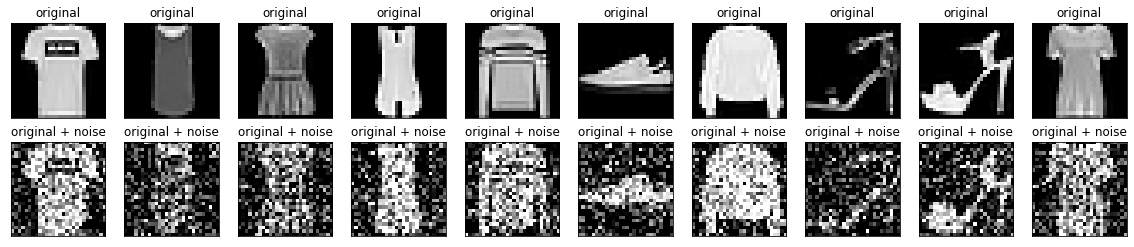

In [19]:
# Viewing the image before and after adding noise

def show_image(X_TR,X_TR_NOISY,n = 10):
  plt.figure(figsize=(20, 4))
  for i in range(1, n + 1):
    ax = plt.subplot(2, n, i)
    plt.title("original")
    plt.imshow(X_TR[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i + n )
    plt.title("original + noise")
    plt.imshow(X_TR_NOISY[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
  plt.show()

show_image(X_TR,X_train_noisy,10)

## Building an Autoencoder Deep Learning model

In [20]:
## Reusable Function to view model stats
def model_stats(training_model):
  print(training_model.history.keys())
  # summarize training for accuracy
  plt.plot(training_model.history['accuracy'])
  plt.plot(training_model.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize traning for loss
  plt.plot(training_model.history['loss'])
  plt.plot(training_model.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

In [21]:
## Building Encoder
in_autoencoder = Input(shape=(28,28,1))

def gen_encoder(input_encode = (1,1,1)):
  en_conv_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_encode)
  en_pool_1 = MaxPooling2D(pool_size=(2,2), padding='same')(en_conv_1)
  en_conv_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(en_pool_1)
  en_out = MaxPooling2D(pool_size=(2, 2), padding='same')(en_conv_2)

  return en_out

In [22]:
## Building Decomder function which takes encoder as input

def gen_decoder(encoder=None):
  de_conv_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(encoder)
  ## Upsampling
  de_up_1 = UpSampling2D(size=(2,2))(de_conv_1)
  de_conv_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(de_up_1)
  de_up_2 = UpSampling2D(size=(2,2))(de_conv_2)
  de_out = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(de_up_2)

  return de_out


### Model 1 : Using loss function as Mean Square

In [23]:
## Instantiating Encoder and Decoder
encode = gen_encoder(in_autoencoder)
decode = gen_decoder(encode)

In [24]:
## Defining Model and compiling it
autoencoder_1 = Model(inputs = in_autoencoder, outputs = decode)
autoencoder_1.compile(optimizer= 'adam',  loss= 'mse', metrics=['accuracy'])

In [25]:
## Model Summary
autoencoder_1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 32)        0     

In [26]:
## Traning the model
train_1 = autoencoder_1.fit(X_train_noisy, X_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(X_test_noisy, X_test),
                verbose = 2)

Epoch 1/100
469/469 - 4s - loss: 0.0268 - accuracy: 0.5045 - val_loss: 0.0179 - val_accuracy: 0.5042
Epoch 2/100
469/469 - 2s - loss: 0.0168 - accuracy: 0.5071 - val_loss: 0.0165 - val_accuracy: 0.5056
Epoch 3/100
469/469 - 2s - loss: 0.0155 - accuracy: 0.5076 - val_loss: 0.0152 - val_accuracy: 0.5058
Epoch 4/100
469/469 - 2s - loss: 0.0146 - accuracy: 0.5079 - val_loss: 0.0144 - val_accuracy: 0.5055
Epoch 5/100
469/469 - 2s - loss: 0.0140 - accuracy: 0.5081 - val_loss: 0.0138 - val_accuracy: 0.5059
Epoch 6/100
469/469 - 3s - loss: 0.0136 - accuracy: 0.5082 - val_loss: 0.0134 - val_accuracy: 0.5061
Epoch 7/100
469/469 - 2s - loss: 0.0132 - accuracy: 0.5083 - val_loss: 0.0132 - val_accuracy: 0.5063
Epoch 8/100
469/469 - 2s - loss: 0.0129 - accuracy: 0.5084 - val_loss: 0.0129 - val_accuracy: 0.5062
Epoch 9/100
469/469 - 2s - loss: 0.0127 - accuracy: 0.5085 - val_loss: 0.0127 - val_accuracy: 0.5063
Epoch 10/100
469/469 - 2s - loss: 0.0126 - accuracy: 0.5085 - val_loss: 0.0126 - val_accura

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


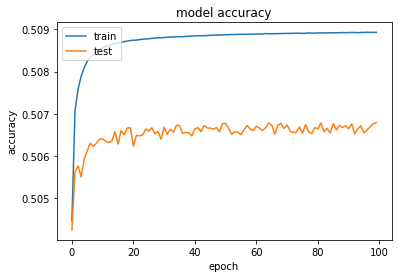

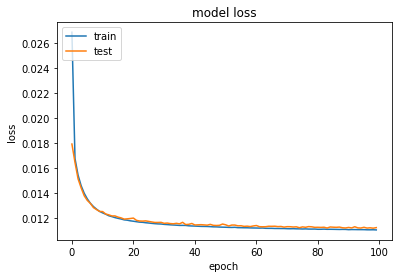

In [27]:
# View Model Stats
model_stats(train_1)

In [28]:
## Predicting using trained model
decoded_imgs_1 = autoencoder_1.predict(X_test)

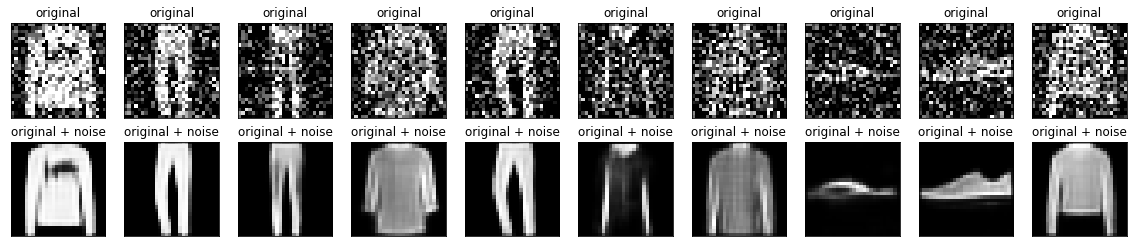

In [29]:
## View output of trained model
show_image(X_test_noisy,decoded_imgs_1,10)

### Model 2 : Using loss function as Binary Cross Entropy

In [30]:
## Instantiating Encoder and Decoder
encode = gen_encoder(in_autoencoder)
decode = gen_decoder(encode)
autoencoder_2 = Model(inputs = in_autoencoder, outputs = decode)
autoencoder_2.compile(optimizer= 'adam',  loss= 'binary_crossentropy', metrics=['accuracy'])

In [31]:
train_2 = autoencoder_2.fit(X_train_noisy, X_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(X_test_noisy, X_test),
                verbose = 2)

Epoch 1/100
469/469 - 3s - loss: 0.3225 - accuracy: 0.5042 - val_loss: 0.2989 - val_accuracy: 0.5045
Epoch 2/100
469/469 - 2s - loss: 0.2941 - accuracy: 0.5071 - val_loss: 0.2938 - val_accuracy: 0.5050
Epoch 3/100
469/469 - 2s - loss: 0.2904 - accuracy: 0.5076 - val_loss: 0.2912 - val_accuracy: 0.5056
Epoch 4/100
469/469 - 2s - loss: 0.2882 - accuracy: 0.5078 - val_loss: 0.2895 - val_accuracy: 0.5058
Epoch 5/100
469/469 - 2s - loss: 0.2868 - accuracy: 0.5080 - val_loss: 0.2885 - val_accuracy: 0.5061
Epoch 6/100
469/469 - 2s - loss: 0.2855 - accuracy: 0.5081 - val_loss: 0.2876 - val_accuracy: 0.5058
Epoch 7/100
469/469 - 2s - loss: 0.2846 - accuracy: 0.5083 - val_loss: 0.2864 - val_accuracy: 0.5063
Epoch 8/100
469/469 - 2s - loss: 0.2838 - accuracy: 0.5084 - val_loss: 0.2855 - val_accuracy: 0.5061
Epoch 9/100
469/469 - 2s - loss: 0.2831 - accuracy: 0.5084 - val_loss: 0.2851 - val_accuracy: 0.5064
Epoch 10/100
469/469 - 2s - loss: 0.2826 - accuracy: 0.5085 - val_loss: 0.2845 - val_accura

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


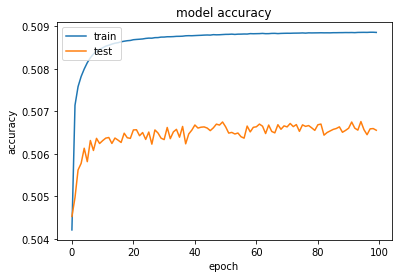

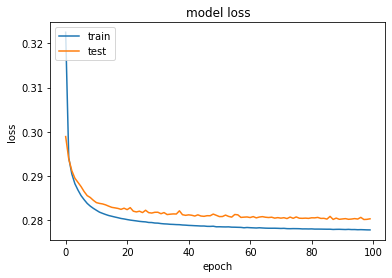

In [32]:
model_stats(train_2)

In [33]:
decoded_imgs_2 = autoencoder_2.predict(X_test)

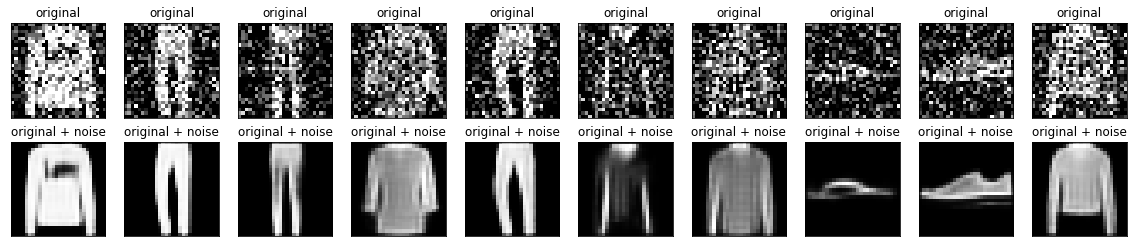

In [34]:
show_image(X_test_noisy,decoded_imgs_2,10)

## Summary

1. The program starts with loading the MNIST fashion data. Then the data is normalised between [0,1] for before feeding it to the model.
2. Another set of data is created with Salt and Pepper noise added to it.
3. A Model for encoder is created with convolution layers. The output of convulution layer is fed to Maxpooling layer. 
4. Then a model for decoder is created where encoder is an input. The model has a convolution layer followed by Upsampling where the dimesions are doubled and transpose is performed on convulution layer.
5. Finally an denoising auto-encoder model is created using decoder model. The model is complied using Adam optimiser.

   a) The model is first ran using Mean Square a loss function. The outcome of feature extraction is significant comapred to noisy picture.

   b) The second model is compiled using binary cross entrophy as loss function. The model gave almost same output and was able to generate significant feature extraction from nopisy images.
